In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option("display.max_columns", 100)

In [29]:
# Importando arquivos
investimento1 = pd.read_csv('investimento_parte1.csv')
investimento2 = pd.read_csv('investimento_parte2.csv')
cadastros = pd.read_csv('cadastro.csv')

# Juntando dados
inv = pd.concat([investimento1, investimento2])

# Removendo valores duplicados
investimentos = inv[~inv.duplicated()]

# Juntando tabelas e removendo $
investidores = cadastros.join(investimentos.set_index('id'), on='id')
investidores['Salario'] = investidores['Salario'].str.replace('$', '', regex=False).astype(float)

# Total de ativos
# ['Ativo01', 'Ativo02', 'Ativo03', 'Ativo04', 'Ativo05', 'Ativo06', 'Ativo07']
investidores['Total'] = investidores.loc[ : , 'Ativo01':'Ativo07'].sum(axis=1)

# Qual a proporção de ativos por salário? 
investidores['ApS'] = investidores['Total']/investidores['Salario']

# investidores[investidores['Salario'] > 0].sort_values('ApS', ascending=False)

investidores['Media'] = investidores.loc[:, 'Nota1':'Nota2'].mean(axis = 1)

# medias = investidores[['Nota1', 'Nota2']].fillna(-101).mean(axis = 1)
# medias[(medias < 0) | (medias > -100)]

print('Nota1 NA:', investidores['Nota1'].isna().sum())
print('Nota2 NA:', investidores['Nota2'].isna().sum())
print('Nota1 & Nota2 NA:', investidores[investidores['Nota2'].isna() & investidores['Nota1'].isna()]['Nota1'].isna().sum())



Nota1 NA: 3000
Nota2 NA: 2000
Nota1 & Nota2 NA: 165


## 

Text(0, 0.5, 'Contagem')

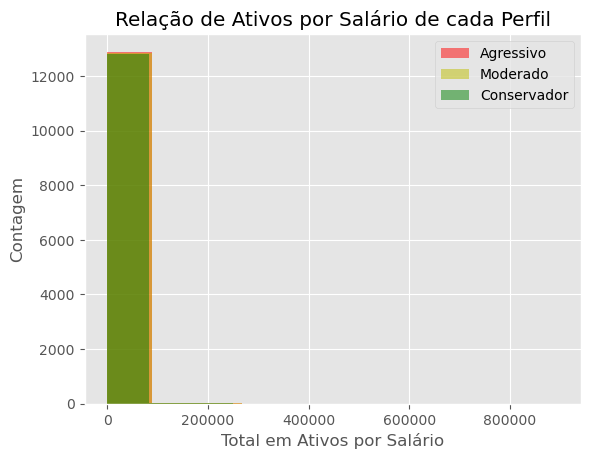

In [263]:
# Ativos por Salário por Perfil

# plt.hist(investidores[investidores['Salario'] < 100]['Salario'])
x1 = investidores.loc[investidores['Perfil'] == 'Agressivo', 'ApS']
x2 = investidores.loc[investidores['Perfil'] == 'Moderado', 'ApS']
x3 = investidores.loc[investidores['Perfil'] == 'Conservador', 'ApS']

n = 1_000_000

x1 = x1[x1 < n]
x2 = x2[x2 < n]
x3 = x3[x3 < n]

plt.hist(x1, color = 'r', bins = 10, alpha = 0.5, label = 'Agressivo')
plt.hist(x2, color = 'y', bins = 10, alpha = 0.5, label = 'Moderado')
plt.hist(x3, color = 'g', bins = 10, alpha = 0.5, label = 'Conservador')
plt.legend()
plt.title('Relação de Ativos por Salário de cada Perfil')
plt.xlabel('Total em Ativos por Salário')
plt.ylabel('Contagem')
# plt.hist(investidores['Salario'], bins = 10)

# Os salários estão visualmente distribuídos de forma semelhante entre os perfis de investidores

Text(0, 0.5, 'Contagem')

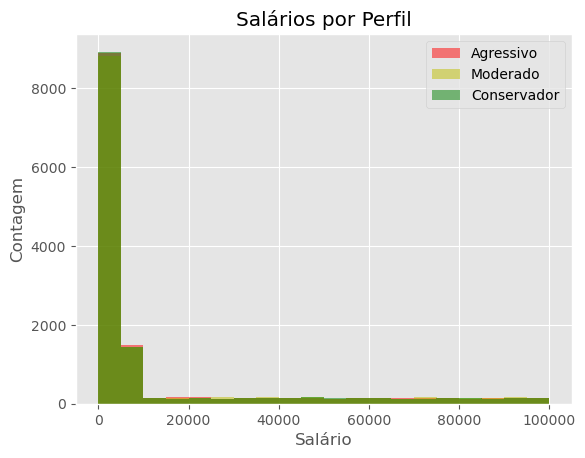

In [286]:
# Relação de salários por perfil de investidor

x1 = investidores.loc[investidores['Perfil'] == 'Agressivo', 'Salario']
x2 = investidores.loc[investidores['Perfil'] == 'Moderado', 'Salario']
x3 = investidores.loc[investidores['Perfil'] == 'Conservador', 'Salario']

n = 1_000_000

x1 = x1[x1 < n]
x2 = x2[x2 < n]
x3 = x3[x3 < n]

plt.hist(x1, color = 'r', bins = 20, alpha = 0.5, label = 'Agressivo')
plt.hist(x2, color = 'y', bins = 20, alpha = 0.5, label = 'Moderado')
plt.hist(x3, color = 'g', bins = 20, alpha = 0.5, label = 'Conservador')
plt.legend()
plt.title('Salários por Perfil')
plt.xlabel('Salário')
plt.ylabel('Contagem')

Text(0, 0.5, 'Contagem')

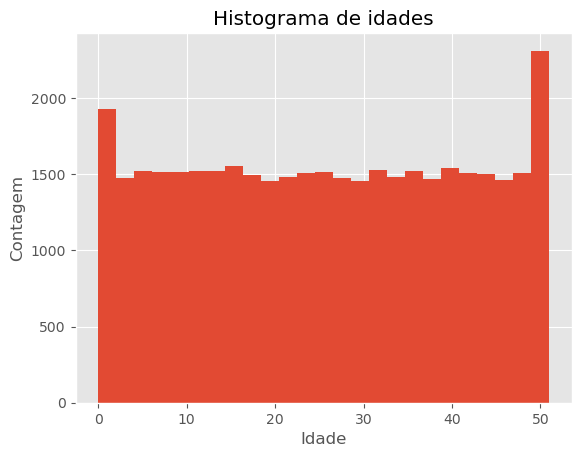

In [264]:
# Histograma de idades

plt.hist(investidores['Idade'], bins = 25)
plt.title('Histograma de idades')
plt.xlabel('Idade')
plt.ylabel('Contagem')

Text(0, 0.5, 'Contagem')

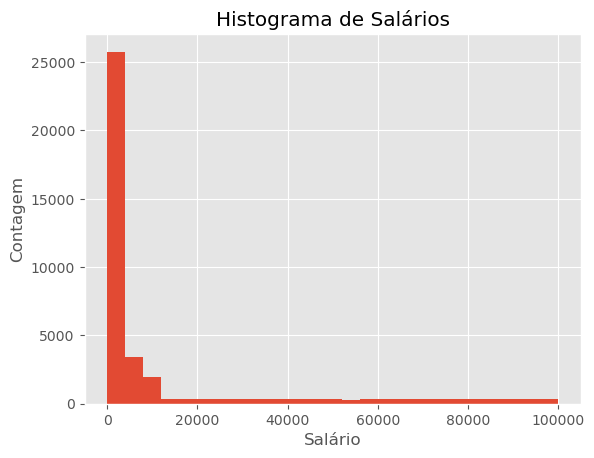

In [268]:
# Histograma de salários

plt.hist(investidores['Salario'], bins = 25)
plt.title('Histograma de Salários')
plt.xlabel('Salário')
plt.ylabel('Contagem')

Text(0, 0.5, 'Contagem')

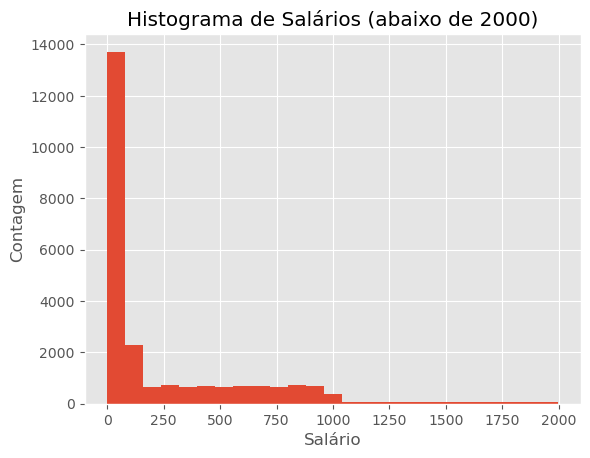

In [272]:
# Histograma de salários

plt.hist(investidores[investidores['Salario'] < 2_000]['Salario'], bins = 25)
plt.title('Histograma de Salários (abaixo de 2000)')
plt.xlabel('Salário')
plt.ylabel('Contagem')

Text(0, 0.5, 'Salário')

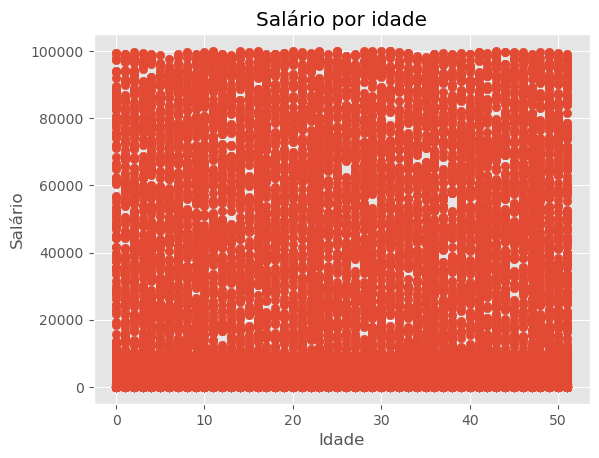

In [273]:
fig, ax = plt.subplots()
ax.scatter(investidores['Idade'], investidores['Salario'])
ax.set_title('Salário por idade')
ax.set_xlabel('Idade')
ax.set_ylabel('Salário')

Text(0, 0.5, 'Salário')

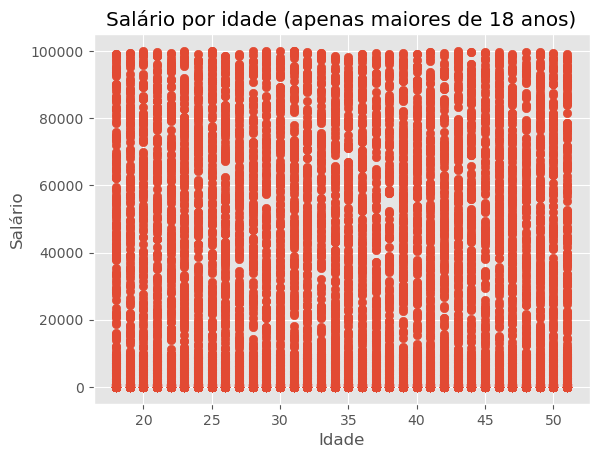

In [265]:
fig, ax = plt.subplots()
ax.scatter(investidores[investidores['Idade'] >= 18]['Idade'], investidores[investidores['Idade'] >= 18]['Salario'])
ax.set_title('Salário por idade (apenas maiores de 18 anos)')
ax.set_xlabel('Idade')
ax.set_ylabel('Salário')

Text(0, 0.5, 'Valor do ativo')

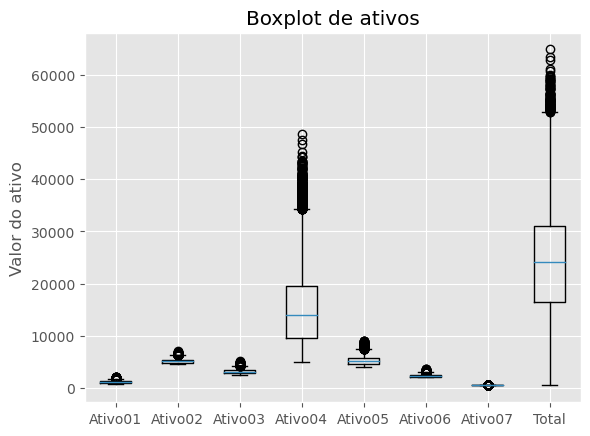

In [279]:
df = investidores

# plt.boxplot(df['Ativo01'], df['Ativo02'], df['Ativo03'], df['Ativo04'], df['Ativo05'], df['Ativo06'], df['Ativo07'], df['Total'])
df1 = df[df['Ativo01'] > 0]['Ativo01']
df2 = df[df['Ativo02'] > 0]['Ativo02']
df3 = df[df['Ativo03'] > 0]['Ativo03']
df4 = df[df['Ativo04'] > 0]['Ativo04']
df5 = df[df['Ativo05'] > 0]['Ativo05']
df6 = df[df['Ativo06'] > 0]['Ativo06']
df7 = df[df['Ativo07'] > 0]['Ativo07']

data = [df1, df2, df3, df4, df5, df6, df7, df['Total']]

plt.boxplot(data, labels = ['Ativo01', 'Ativo02', 'Ativo03', 'Ativo04', 'Ativo05', 'Ativo06', 'Ativo07', 'Total'])
plt.title('Boxplot de ativos')
plt.ylabel('Valor do ativo')

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_3724\2028847506.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas['Media'] = notas.mean(axis = 1, skipna=False)


Text(0, 0.5, 'Valor nota')

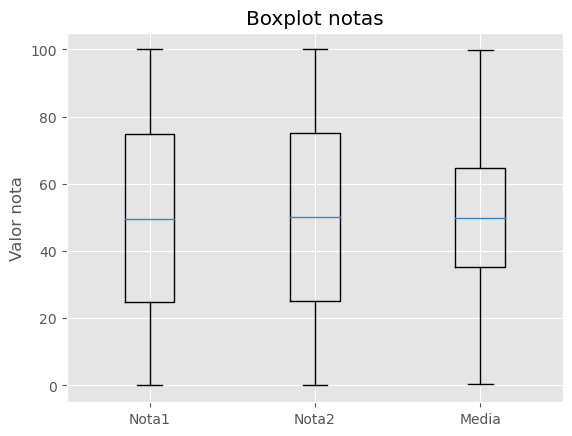

In [278]:
# Boxplot de notas

notas = investidores[['Nota1', 'Nota2']]

# plt.boxplot(notas.mean(axis = 1, skipna=True))

notas['Media'] = notas.mean(axis = 1, skipna=False)
medias = notas[~notas['Media'].isna()]['Media']

notas1 = notas[~notas['Media'].isna()]
# notas2 = notas[~notas['Nota2'].isna()]


plt.boxplot(notas1, labels = ['Nota1', 'Nota2', 'Media'])
plt.title('Boxplot notas')
plt.ylabel('Valor nota')

In [245]:
# distribuição de ativos

# ativos = pd.melt(investidores, id_vars = 'id', value_vars= ['Ativo01', 'Ativo02', 'Ativo03', 'Ativo04', 'Ativo05', 'Ativo06', 'Ativo07'])

# ativos = ativos[~ativos.isna()]

# sns.displot(ativos, x = 'value')

Text(0, 0.5, 'Contagem')

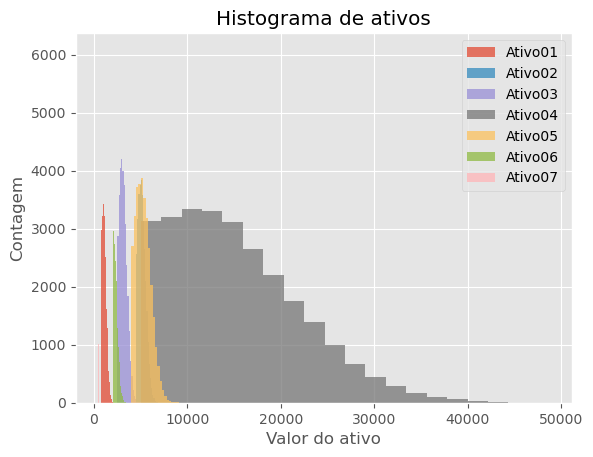

In [251]:
plt.hist(investidores['Ativo01'], bins = 20, alpha = .75, label = 'Ativo01')
plt.hist(investidores['Ativo02'], bins = 20, alpha = .75, label = 'Ativo02')
plt.hist(investidores['Ativo03'], bins = 20, alpha = .75, label = 'Ativo03')
plt.hist(investidores['Ativo04'], bins = 20, alpha = .75, label = 'Ativo04')
plt.hist(investidores['Ativo05'], bins = 20, alpha = .75, label = 'Ativo05')
plt.hist(investidores['Ativo06'], bins = 20, alpha = .75, label = 'Ativo06')
plt.hist(investidores['Ativo07'], bins = 20, alpha = .75, label = 'Ativo07')
plt.legend()
plt.title('Histograma de ativos')
plt.xlabel('Valor do ativo')
plt.ylabel('Contagem')


Text(0, 0.5, 'Contagem')

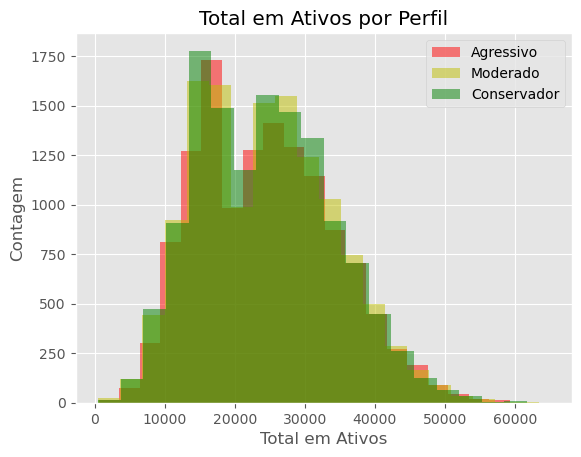

In [287]:
# Relação de ativos por perfil de investidor

x1 = investidores.loc[investidores['Perfil'] == 'Agressivo', 'Total']
x2 = investidores.loc[investidores['Perfil'] == 'Moderado', 'Total']
x3 = investidores.loc[investidores['Perfil'] == 'Conservador', 'Total']

n = 1_000_000

x1 = x1[x1 < n]
x2 = x2[x2 < n]
x3 = x3[x3 < n]

plt.hist(x1, color = 'r', bins = 20, alpha = 0.5, label = 'Agressivo')
plt.hist(x2, color = 'y', bins = 20, alpha = 0.5, label = 'Moderado')
plt.hist(x3, color = 'g', bins = 20, alpha = 0.5, label = 'Conservador')
plt.legend()
plt.title('Total em Ativos por Perfil')
plt.xlabel('Total em Ativos')
plt.ylabel('Contagem')

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_3724\3225037432.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


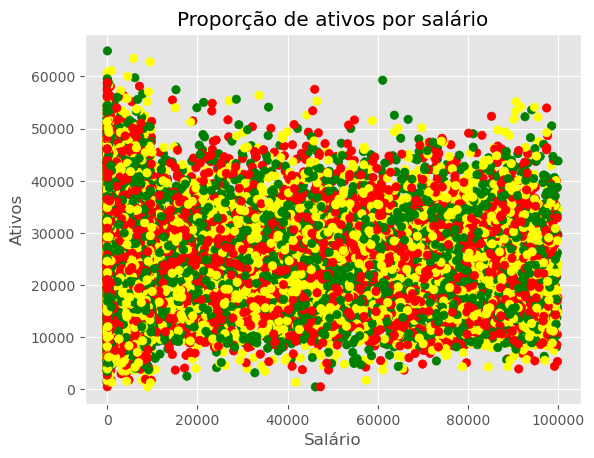

In [164]:
colors = {'Agressivo':'red', 'Moderado':'yellow', 'Conservador':'green'}

fig, ax = plt.subplots()
ax.scatter(investidores['Salario'], investidores['Total'], c = investidores['Perfil'].map(colors))
ax.set_title('Proporção de ativos por salário')
ax.set_xlabel('Salário')
ax.set_ylabel('Ativos')

fig.show()
# investidores

Text(0, 0.5, 'Contagem')

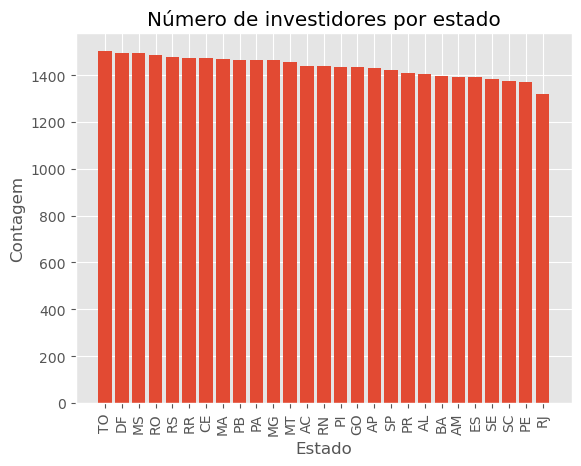

In [17]:
plt.bar(investidores['Estado'].unique(), investidores['Estado'].value_counts(), )
plt.title('Número de investidores por estado')
plt.xlabel('Estado')
plt.xticks(rotation='vertical')
plt.ylabel('Contagem')

In [41]:
investidores[['Estado', 'Total']].groupby('Estado').sum()

,Total
Estado,
AC,35362505.80
AL,33763479.45
AM,37036424.81
AP,34996432.12
BA,36188507.51
CE,35959807.36
DF,36277409.37
ES,36112618.12
GO,34234860.26


Text(0, 0.5, 'Contagem')

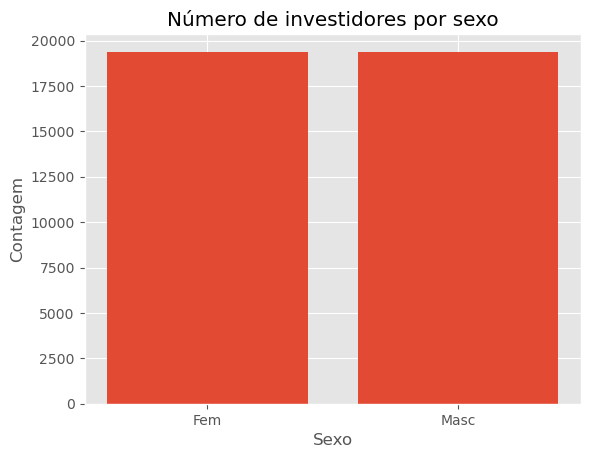

In [22]:
plt.bar(investidores['Sexo'].unique(), investidores['Sexo'].value_counts(), )
plt.title('Número de investidores por sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')

In [25]:
investidores['Perfil'].value_counts()

Agressivo      12975
Moderado       12900
Conservador    12879
Name: Perfil, dtype: int64

In [38]:
investidores[~investidores.where(investidores['Sexo'] == 'Fem').where(investidores['Total'] < 10_000)['Total'].isna()]

,id,Nome,Sexo,Nasc,Idade,Email,Lat_long,Job,Estado,Salario,Perfil,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Nota1,Nota2,Total,ApS
70,id0000071,Gabriela Eaziu,Fem,2015-10-10,6,reginaturner@hotmail.com,"(Decimal('-80.885788'), Decimal('59.001982'))",Patent attorney,PB,9190.93,Moderado,1273.62,4670.99,2615.92,NaN,NaN,NaN,479.24,13.244855,73.281455,9039.77,0.983553
115,id0000116,Ana de Campos dos Santos Terceiro,Fem,2017-08-25,4,sweeneybridget@yahoo.com,"(Decimal('53.7171225'), Decimal('-90.107695'))",Medical sales representative,RS,8.49,Moderado,1019.53,NaN,NaN,NaN,4168.03,NaN,505.03,30.589906,54.052333,5692.59,670.505300
128,id0000129,Vívian Wendy de Barboza,Fem,2014-12-02,7,davidblanchard@hotmail.com,"(Decimal('-32.421911'), Decimal('69.219273'))",Retail banker,RS,6567.07,Agressivo,NaN,4714.40,3978.26,NaN,NaN,NaN,497.45,1.877560,75.200054,9190.11,1.399423
203,id0000204,Selena Frias Gomes,Fem,2000-12-13,21,donald17@hotmail.com,"(Decimal('-9.9177315'), Decimal('-73.456822'))",Pensions consultant,ES,1.94,Moderado,1186.69,4534.76,2909.59,NaN,NaN,NaN,496.13,NaN,2.407331,9127.17,4704.726804
251,id0000252,Lara Adrielle de Lacerda,Fem,1971-02-28,50,urice@yahoo.com,"(Decimal('79.683002'), Decimal('96.630918'))",Early years teacher,RN,73091.30,Conservador,NaN,4728.88,3886.99,NaN,NaN,NaN,502.21,29.139065,55.511991,9118.08,0.124749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38550,id0038551,Suellen Beatriz Roteko,Fem,2003-10-09,18,mckenzieanita@yahoo.com,"(Decimal('75.548447'), Decimal('77.868547'))","Scientist, research (maths)",RO,86.50,Conservador,NaN,4609.72,NaN,NaN,NaN,NaN,486.81,29.558140,76.448651,5096.53,58.919422
38658,id0038659,Francielle Lisa da Silva Mucuman de Souza,Fem,2000-05-12,21,qhumphrey@yahoo.com,"(Decimal('36.836033'), Decimal('85.219156'))",Occupational psychologist,RO,1797.32,Agressivo,1234.45,NaN,3611.78,NaN,NaN,2159.25,486.49,26.848500,34.490050,7491.97,4.168412
38667,id0038668,Cristina Grusty,Fem,1990-11-26,31,valeriegonzalez@yahoo.com,"(Decimal('45.738813'), Decimal('98.988448'))","Psychotherapist, child",AL,77.32,Agressivo,989.34,4927.98,NaN,NaN,NaN,NaN,499.43,17.466261,38.307003,6416.75,82.989524
38678,id0038679,Mirela de Alvarenga,Fem,1999-03-21,22,smithscott@gmail.com,"(Decimal('-3.073638'), Decimal('-160.180487'))",Sub,SE,15812.30,Conservador,1180.98,4742.24,2763.97,NaN,NaN,NaN,505.36,73.012699,6.839973,9192.55,0.581354


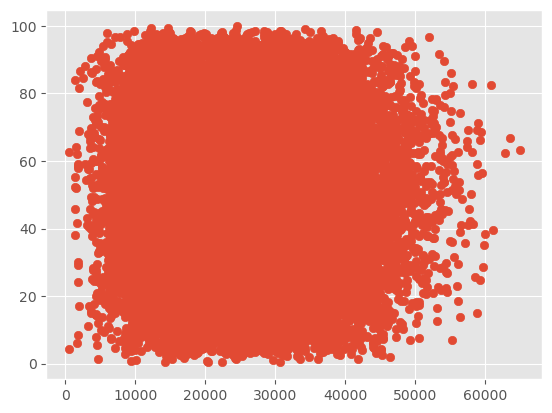

In [12]:
plt.scatter(x = investidores['Total'], y = investidores['Media'])

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_16324\2747044724.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


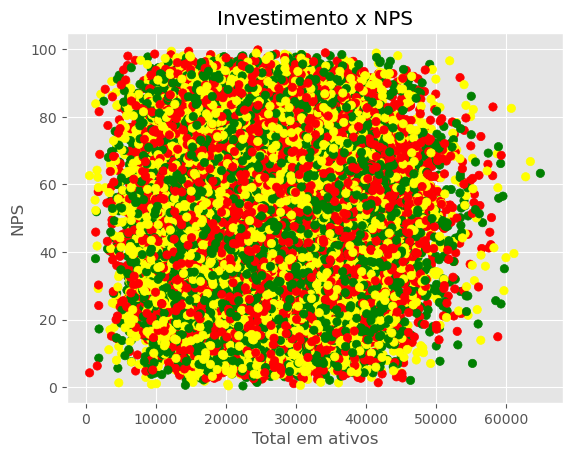

In [15]:
colors = {'Agressivo':'red', 'Moderado':'yellow', 'Conservador':'green'}

fig, ax = plt.subplots()
ax.scatter(investidores['Total'], investidores['Media'], c = investidores['Perfil'].map(colors))
ax.set_title('Investimento x NPS')
ax.set_xlabel('Total em ativos')
ax.set_ylabel('NPS')

fig.show()
# investidores